In [1]:
#%matplotlib notebook

In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Read the mouse and study data into a data frame and merge mouse data and the study results data together
Mouse_Data = Path("data/Mouse_metadata.csv")
Study_Results_Data = Path("data/Study_results.csv")

mouse_data_df = pd.read_csv(Mouse_Data)
study_results_data_df = pd.read_csv(Study_Results_Data)

mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
Mouse_StudyResults_Data_df = pd.merge(mouse_data_df,study_results_data_df,on=["Mouse ID","Mouse ID"])
Mouse_StudyResults_Data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Display the number of unique Mice IDs in the data
Mouse_StudyResults_Data_df["Mouse ID"].nunique()

249

In [7]:
Find_Dupes_df = Mouse_StudyResults_Data_df.groupby(['Mouse ID','Timepoint']).size().to_frame('Num_Occur').reset_index()
Find_Dupes_df
#Find_Dupes_df.head()

Find_Dupes_df.loc[Find_Dupes_df['Num_Occur'] > 1]

#The following mouse id has duplicate entries and they must be removed.

,Mouse ID,Timepoint,Num_Occur
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [8]:
#Display rows with Mouse ID of g989
Mouse_StudyResults_Data_df.loc[Mouse_StudyResults_Data_df['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a new data framme that contains data with out Mouse ID g989.  Data is unreliable for g989 so it will be removed fromt
# the results
Clean_Mouse_StudyResults_Data_df = Mouse_StudyResults_Data_df[Mouse_StudyResults_Data_df["Mouse ID"] != 'g989']
                                                              

In [10]:
# Validate that mouse g989 has been removed
Clean_Mouse_StudyResults_Data_df.loc[Clean_Mouse_StudyResults_Data_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [11]:
# Display the number of unique Mice IDs in the data set now that the duplicates have been removed.
Clean_Mouse_StudyResults_Data_df["Mouse ID"].nunique()

248

In [12]:
#Determine if any duplicates are left.
Find_Dupes2_df = Clean_Mouse_StudyResults_Data_df.groupby(['Mouse ID','Timepoint']).size().to_frame('Num_Occur').reset_index()
Find_Dupes2_df
#Find_Dupes_df.head()

Find_Dupes2_df.loc[Find_Dupes2_df['Num_Occur'] > 1]

,Mouse ID,Timepoint,Num_Occur


In [13]:
# Find the Mean, Median, Variance, Standard Deviation, and SEM of the Tumor Volume (mm3) data for each drug
Mean_of_Regiman = Clean_Mouse_StudyResults_Data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().to_frame('Mean_TVmm').reset_index()
Median_of_Regiman = Clean_Mouse_StudyResults_Data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().to_frame('Median_TV').reset_index()
Variance_of_Regiman = Clean_Mouse_StudyResults_Data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().to_frame('Variance_TV').reset_index()
STDVar_of_Regiman = Clean_Mouse_StudyResults_Data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().to_frame('STD_Dev_TV').reset_index()
SEM_of_Regiman = Clean_Mouse_StudyResults_Data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().to_frame('SEM_TV').reset_index()
Mean_of_Regiman

,Drug Regimen,Mean_TVmm
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.320930
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [14]:
# Create a new dataframe with a summary of the statistics found above by merging the individual
# dataframes together on Drug Regimen
Stats_Summary1 = pd.merge(Mean_of_Regiman,Median_of_Regiman,on=["Drug Regimen","Drug Regimen"])
Stats_Summary2 = pd.merge(Stats_Summary1,Variance_of_Regiman,on=["Drug Regimen","Drug Regimen"])
Stats_Summary3 = pd.merge(Stats_Summary2,STDVar_of_Regiman,on=["Drug Regimen","Drug Regimen"])
Stats_Summary = pd.merge(Stats_Summary3,SEM_of_Regiman,on=["Drug Regimen","Drug Regimen"])
Stats_Summary


,Drug Regimen,Mean_TVmm,Median_TV,Variance_TV,STD_Dev_TV,SEM_TV
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


<Axes: xlabel='Drug Regimen'>

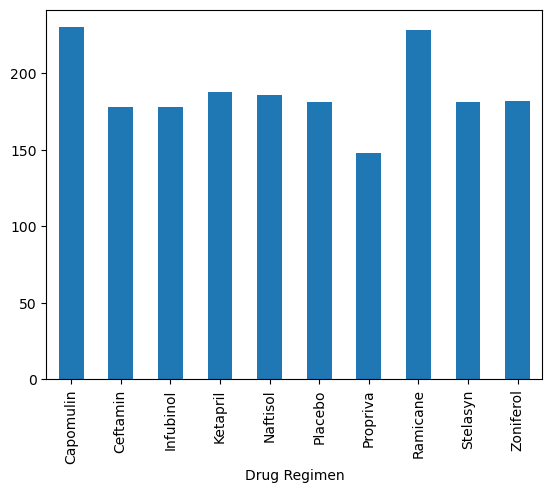

In [15]:
# Use Dataframe.plot to create a bar chart
Clean_Mouse_StudyResults_Data_df.groupby(['Drug Regimen',]).size().plot(kind='bar')
#,rot=45, fontsize=10, color='b',title='Number of Mouse Timepoints',figsize=(9, 9),xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints")

In [34]:
#Use matplotlib to create bar chart.
Drug_Timepoints_df = Clean_Mouse_StudyResults_Data_df.groupby(['Drug Regimen',]).size().to_frame('Num_Occur').reset_index()
Drug_Timepoints_df


#
#                CONTINUE PLPLOT BAR CHART HERE   #######################

#################   **************************

,Drug Regimen,Num_Occur
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


<Axes: >

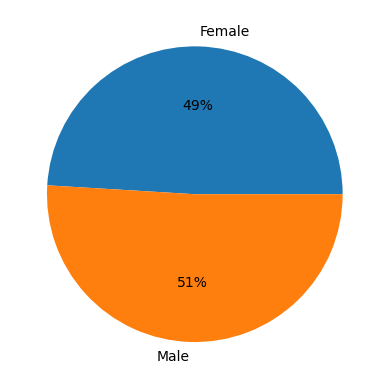

In [32]:
#Use pyplot to create a bar chart
Clean_Mouse_StudyResults_Data_df.groupby(['Sex',]).size().plot(kind='pie',y='Sex',autopct='%1.0f%%')


In [35]:
Mouse_Sex_df = Clean_Mouse_StudyResults_Data_df.groupby(['Sex',]).size().to_frame('Num_Occur').reset_index()
Mouse_Sex_df

,Sex,Num_Occur
0,Female,922
1,Male,958


In [ ]:
#
#                CONTINUE PLPLOT BAR CHART HERE   #######################

#################   **************************